In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Datasets/spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.shape

(5572, 5)

In [6]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

#### Удалим  столбцы Unnamed:2, Unnamed:3, Unnamed:4

In [7]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Переименуем столбцы

In [8]:
data = data.rename({'v1': 'Class', 'v2': 'Message'}, axis=1)
data.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Предварительный анализ данных (EDA)

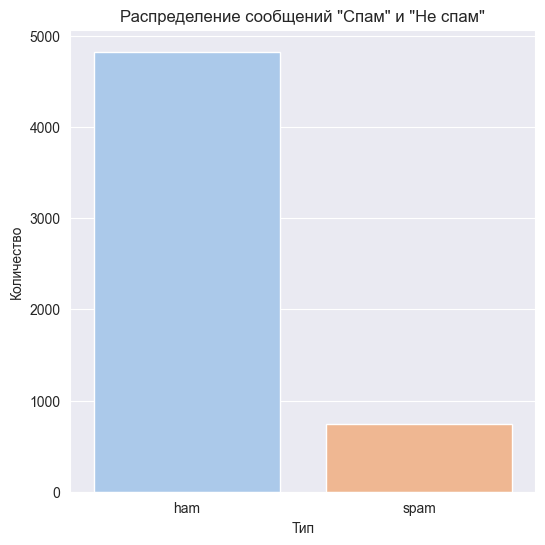

In [9]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=data, palette='pastel')
plt.xlabel('Тип')
plt.ylabel('Количество')
plt.title('Распределение сообщений "Спам" и "Не спам"')
plt.show()

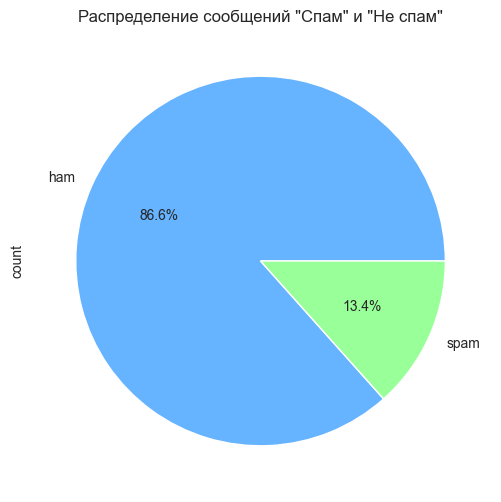

In [10]:
plt.figure(figsize=(6, 6))
data['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'])
plt.title('Распределение сообщений "Спам" и "Не спам"')
plt.show()

In [11]:
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import re


def clean_text(text):
    # Приводим текст к нижнему регистру
    text = text.lower()
    # Удаляем все символы, отличные от цифр и букв, заменяя их на пробел
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # Заменяем последовательности пробелов на одиночные пробелы
    text = re.sub(r'\s+', ' ', text)
    # Удаляем стоп-слова из текста
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [13]:
data['clean_text'] = data['Message'].apply(clean_text)
data.head()

,Class,Message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [14]:
X = data['clean_text']
y = data['Class']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import string

# Инициализируем объект PorterStemmer для выполенния стемминга
ps = PorterStemmer()
# Токенизируем текст в список слов
words = word_tokenize('clean_text')

In [16]:
def message_text_process(mess):
    # Удаляем пунктуацию из сообщения, оставляя только символы
    no_punctuation = [char for char in mess if char not in string.punctuation]
    # Объединяем символы обратно в строку
    no_punctuation = ''.join(no_punctuation)
    # Разбиваем строку на отдельные слова и выбираем только те слова, которые не являются стоп-словами
    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [17]:
data['Message'].head(5).apply(message_text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [18]:
# Создаем экземпляр объекта CountVectorizer с использованием анализатора message_text_process и выполняем преобразование fit на столбце 'Message' в DataFrame 'data'
bag_of_words_transformer = CountVectorizer(analyzer=message_text_process).fit(data['Message'])
# Выводим длину словаря, полученного из CountVectorizer
print(len(bag_of_words_transformer.vocabulary_))

11304


In [19]:
message_bagofwords = bag_of_words_transformer.transform(data['Message'])

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(message_bagofwords)

In [21]:
message_tfidf = tfidf_transformer.transform(message_bagofwords)
print(message_tfidf.shape)

(5572, 11304)


In [22]:
from sklearn.naive_bayes import MultinomialNB

spam_detection_model = MultinomialNB().fit(message_tfidf, data['Class'])

In [23]:
# Получаем текст сообщения из столбца 'Message' по индексу 3
message = data['Message'][3]
# Преобразовываем сообщение в мешок слов с использованием ранее созданного объекта bag_of_words_transformer
bag_of_words_for_message = bag_of_words_transformer.transform([message])
# Применяем преобразование TF-IDF к мешку слов
tfidf = tfidf_transformer.transform(bag_of_words_for_message)
# Предсказываем класс сообщения с помощью spam_detection_model
predicted_class = spam_detection_model.predict(tfidf)[0]
# Форматируем и выводим результат предсказания в виде строки
result_message = f'Сообщение определено как {predicted_class.upper()}.'
print(result_message)

Сообщение определено как HAM.


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [25]:
# Функция для построения модели и предсказания
def Model(model, X, y):
    # Разделение данных на тренировочные и тестовые
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
    # Построение модели с использованием CountVectorizer и TfidfTransformer
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf', TfidfTransformer()),
                               ('clf', model)])
    pipeline_model.fit(x_train, y_train)

    y_pred = pipeline_model.predict(x_test)
    y_probas = pipeline_model.predict_proba(x_test)

    # Построение ROC-кривой
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(12, 8), title_fontsize=12, text_fontsize=16)
    plt.show()

    # Построение кривой точность-полнота
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(12, 8), title_fontsize=12, text_fontsize=16)
    plt.show()

    # Вывод матрицы ошибок
    print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))
    # Вывод отчета о классификации
    print("Отчет о классификации:\n", classification_report(y_test, y_pred))
    # Вывод точности
    print('Точность:', pipeline_model.score(x_test, y_test) * 100)
    # Вывод оценки тренировочных данных
    print("Оценка тренировки:\n", pipeline_model.score(x_train, y_train) * 100)

# Создадим модели и протестируем

### 1. Логистическая регрессия
### 2. К ближайших соседей
### 3. Метод опорных векторов
### 4. Наивный Байес
### 5. Дерево решений
### 6. Случайный лес

## 1. Логистическая регрессия

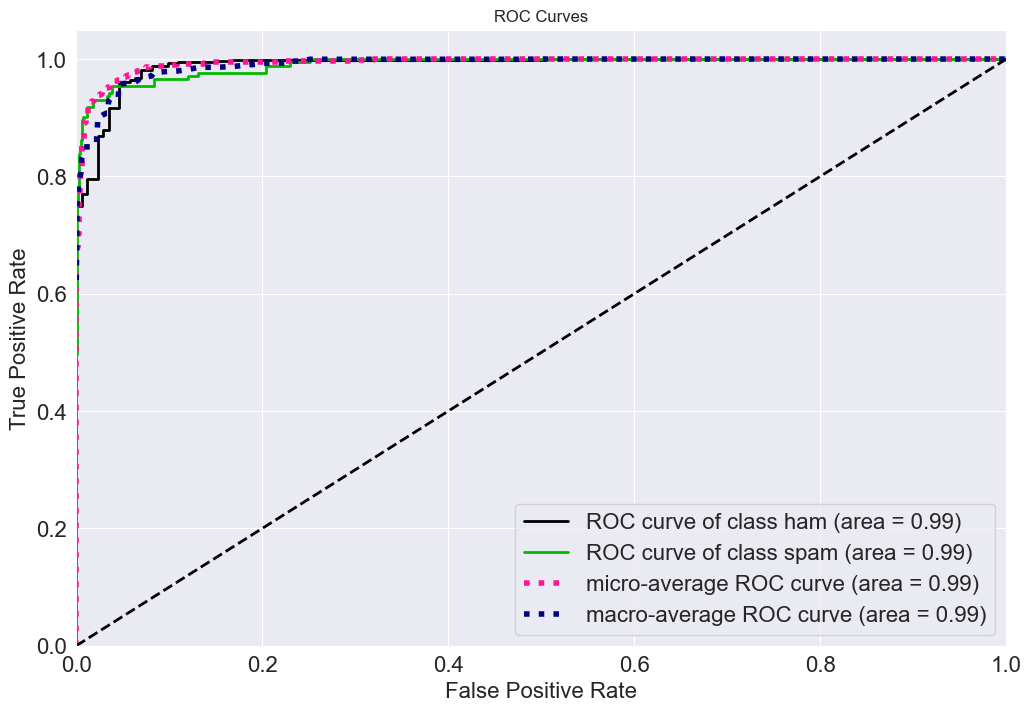

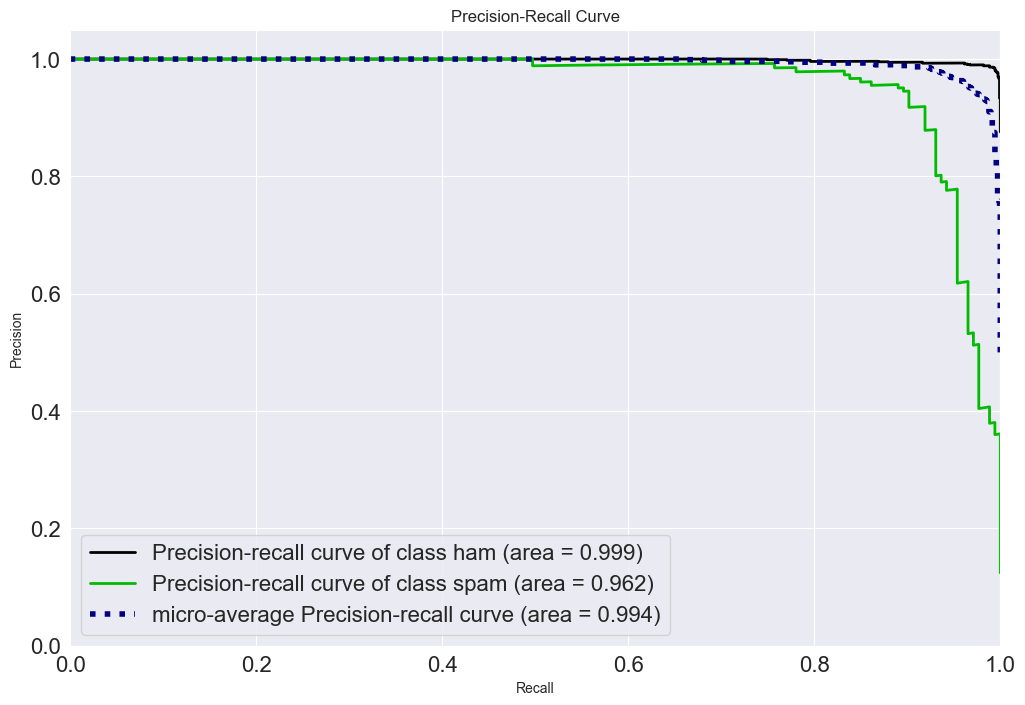

Матрица ошибок:
 [[1219    1]
 [  53  120]]
Отчет о классификации:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1220
        spam       0.99      0.69      0.82       173

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393

Точность: 96.12347451543431
Оценка тренировки:
 96.98492462311557


In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
Model(model, X, y)

## 2. К ближайших соседей

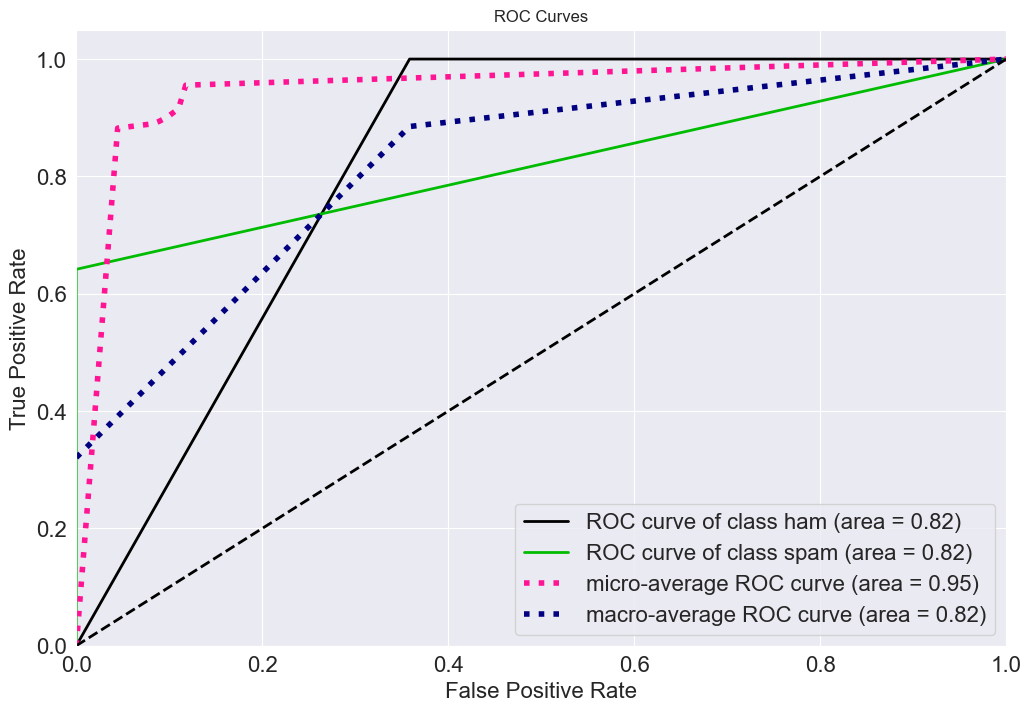

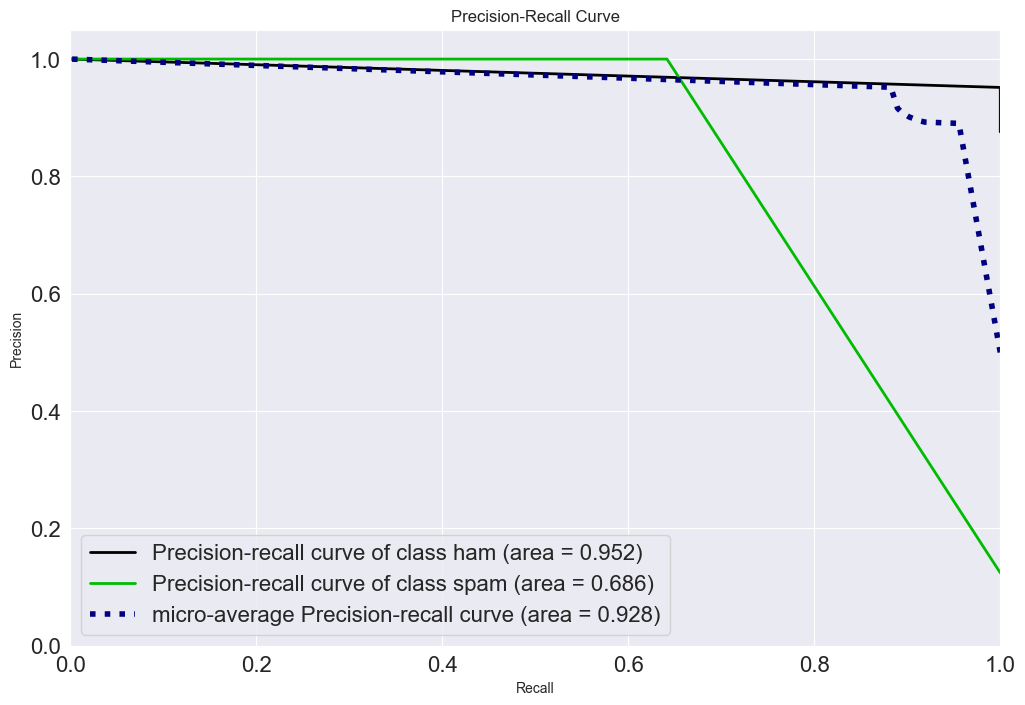

Матрица ошибок:
 [[1220    0]
 [ 137   36]]
Отчет о классификации:
               precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1220
        spam       1.00      0.21      0.34       173

    accuracy                           0.90      1393
   macro avg       0.95      0.60      0.65      1393
weighted avg       0.91      0.90      0.87      1393

Точность: 90.1651112706389
Оценка тренировки:
 90.45226130653266


In [27]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
Model(model, X, y)

## 3. Метод опорных векторов

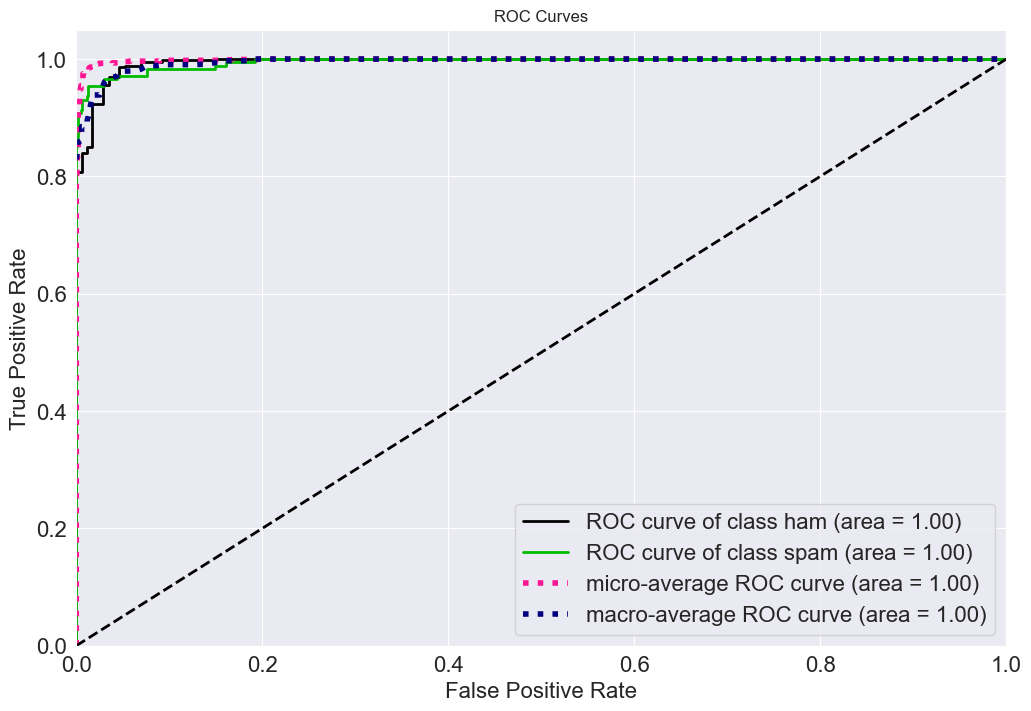

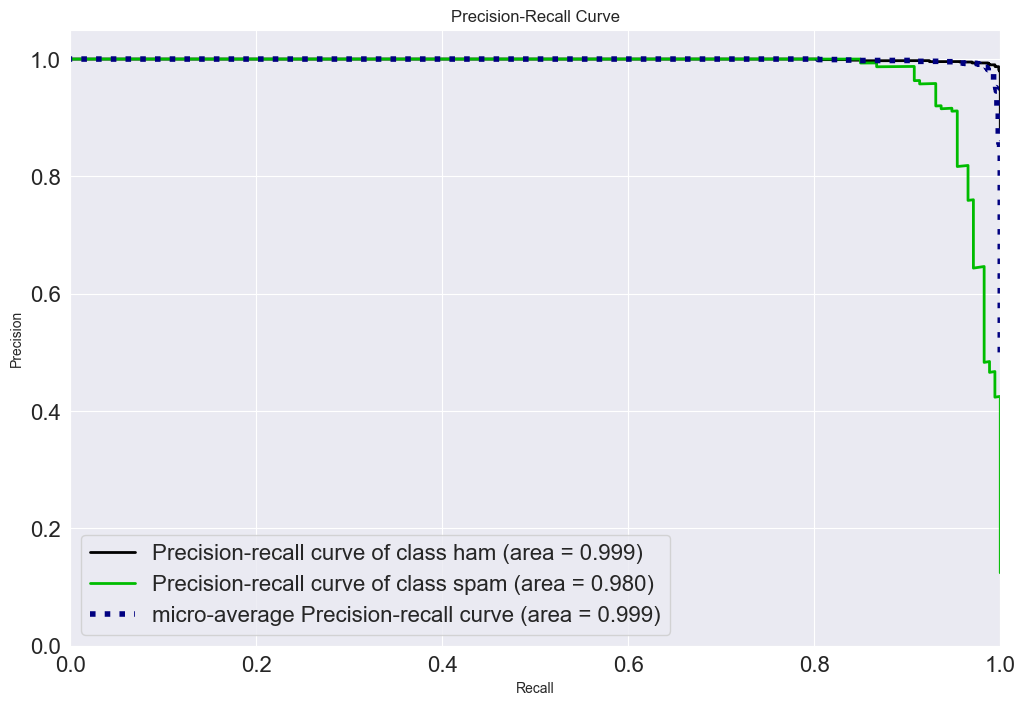

Матрица ошибок:
 [[1220    0]
 [  30  143]]
Отчет о классификации:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1220
        spam       1.00      0.83      0.91       173

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.95      1393
weighted avg       0.98      0.98      0.98      1393
Точность: 97.84637473079684
Оценка тренировки:
 99.83249581239531


In [28]:
from sklearn.svm import SVC

model = SVC(probability=True)
Model(model, X, y)

## 4. Наивный Байес

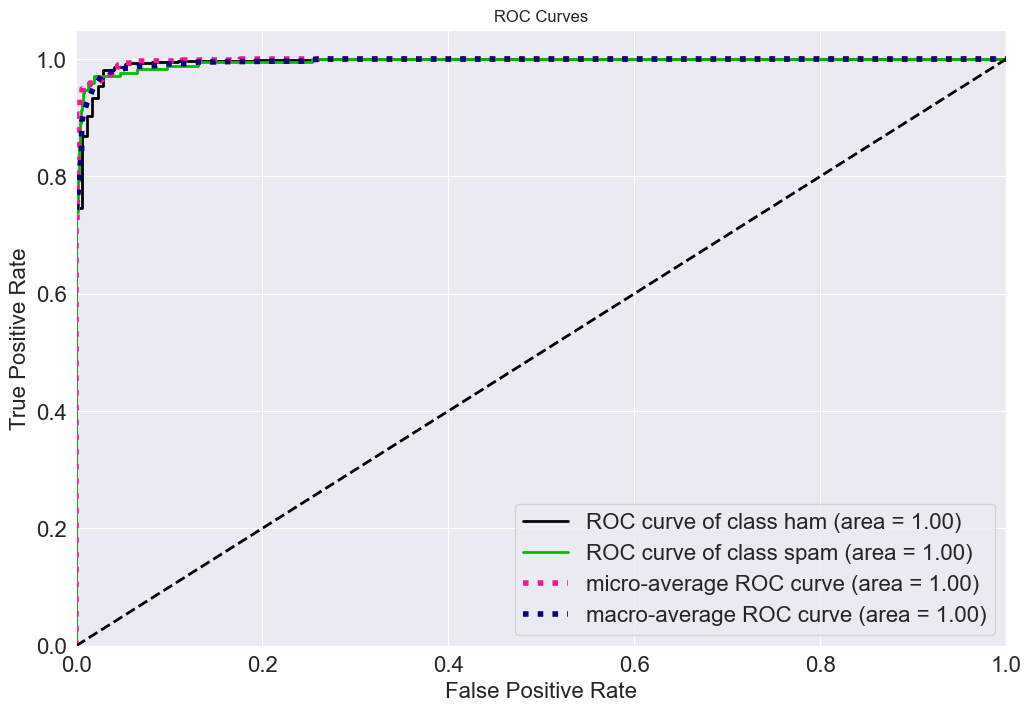

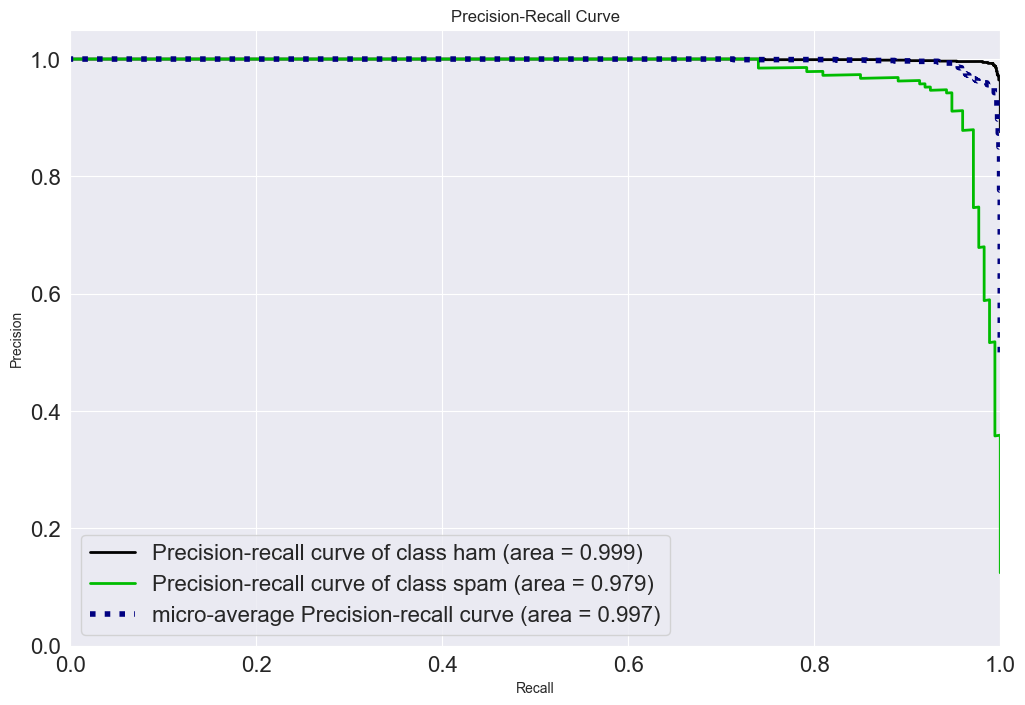

Матрица ошибок:
 [[1218    2]
 [  44  129]]
Отчет о классификации:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1220
        spam       0.98      0.75      0.85       173

    accuracy                           0.97      1393
   macro avg       0.97      0.87      0.92      1393
weighted avg       0.97      0.97      0.96      1393

Точность: 96.69777458722182
Оценка тренировки:
 98.82747068676717


In [29]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
Model(model, X, y)

## 5. Дерево решений

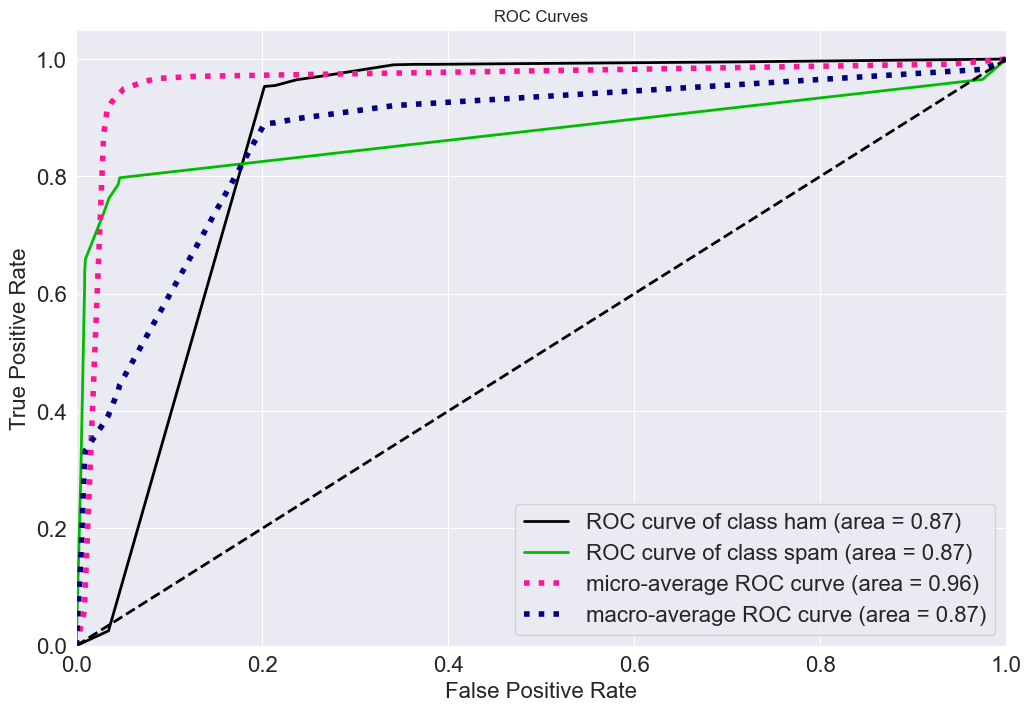

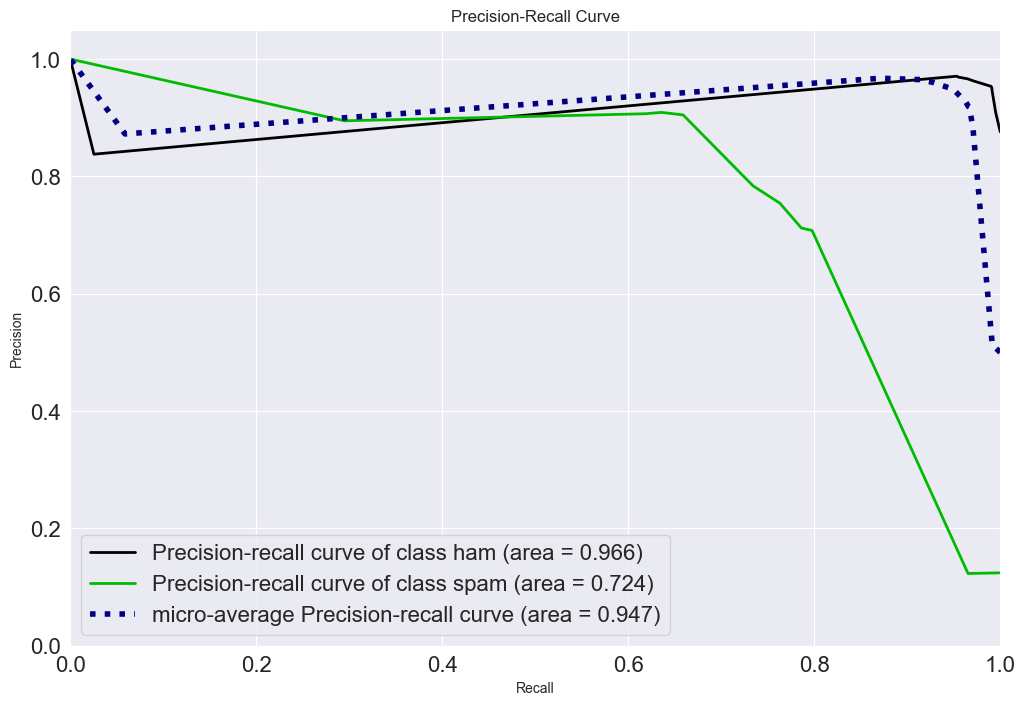

Матрица ошибок:
 [[1208   12]
 [  59  114]]
Отчет о классификации:
               precision    recall  f1-score   support

         ham       0.95      0.99      0.97      1220
        spam       0.90      0.66      0.76       173

    accuracy                           0.95      1393
   macro avg       0.93      0.82      0.87      1393
weighted avg       0.95      0.95      0.95      1393

Точность: 94.90308686288586
Оценка тренировки:
 96.21919119406557


In [30]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth=6, random_state=123, criterion='entropy')
Model(tree_clf, X, y)

## 6. Случайный лес

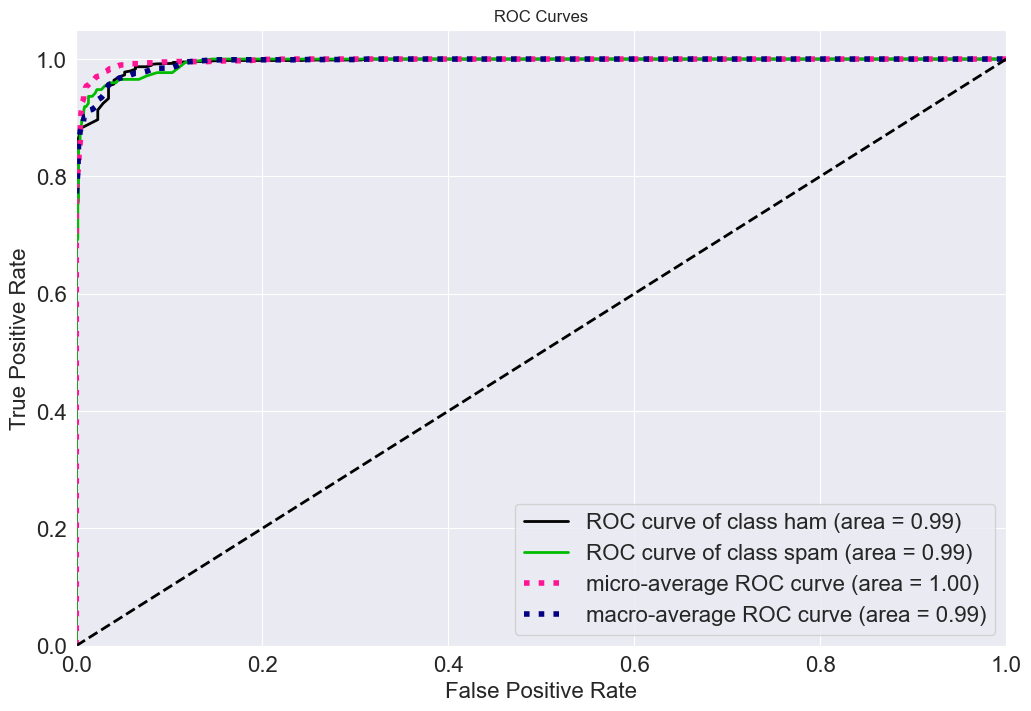

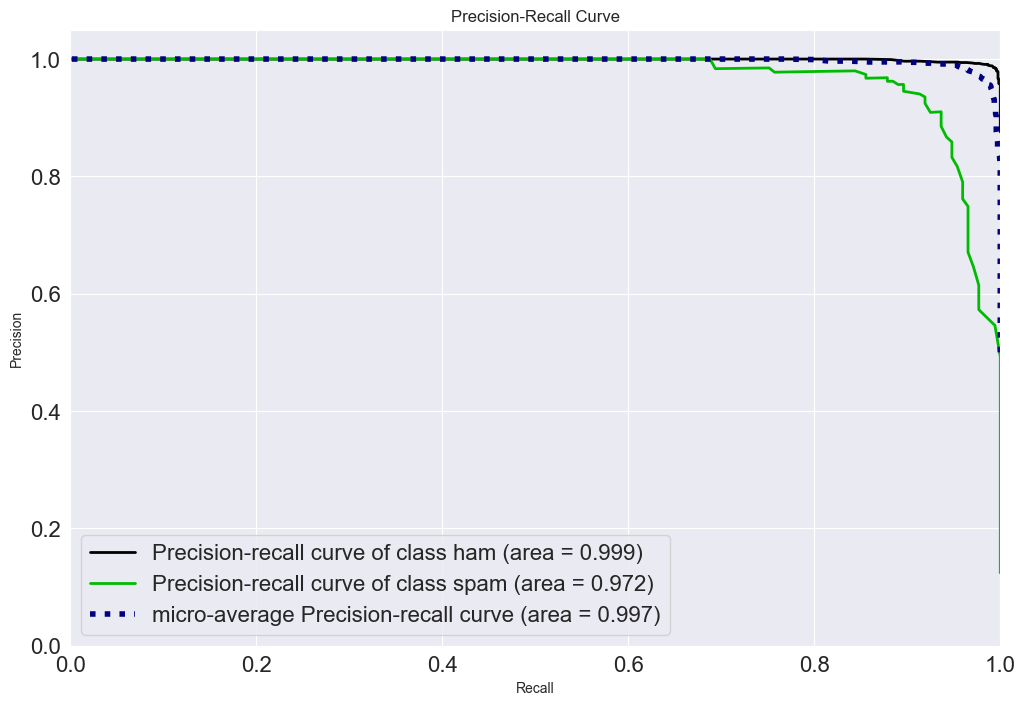

Матрица ошибок:
 [[1217    3]
 [  36  137]]
Отчет о классификации:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1220
        spam       0.98      0.79      0.88       173

    accuracy                           0.97      1393
   macro avg       0.97      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393

Точность: 97.20028715003589
Оценка тренировки:
 100.0


In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
Model(model, X, y)

 Мы получили точность около 98% благодаря использованию алгоритма случайного леса и метода опорных векторов.
 Но, мы можем достичь и лучших результатов, но для этого нам надо познакомиться с взвешенностью классов, а это будет завтра)